# Exploration and Exploitation

In [1]:
using PGFPlots
using Interact
using Reactive
using Distributions
include("helpers.jl")
include("bandits.jl");

## Multi-Armed Bandit Problems

In [2]:
srand(0)
arms = 3
b = Bandit(arms)
banditTrial(b)

Interact.Button{Void}(Signal{Void}(nothing, nactions=0),"Arm 1",nothing)

"0 wins out of 0 tries (NaN percent)"

Interact.Button{Void}(Signal{Void}(nothing, nactions=0),"Arm 2",nothing)

"0 wins out of 0 tries (NaN percent)"

Interact.Button{Void}(Signal{Void}(nothing, nactions=0),"Arm 3",nothing)

"0 wins out of 0 tries (NaN percent)"

Interact.Options{:ToggleButtons,Any}(Signal{Any}(Hide, nactions=0),"True Params","Hide","Hide",Interact.OptionDict(Any["Hide","Show"],Dict{Any,Any}(Pair{Any,Any}("Hide","Hide"),Pair{Any,Any}("Show","Show"))),Any[],Any[])

""

## Bayesian Model Estimation

Interact.Button{Void}(Signal{Void}(nothing, nactions=0),"Arm 1",nothing)

Interact.Button{Void}(Signal{Void}(nothing, nactions=0),"Arm 2",nothing)

"0 wins out of 0 tries (NaN percent)"

"0 wins out of 0 tries (NaN percent)"

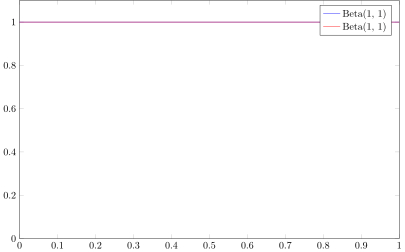

Interact.Options{:ToggleButtons,Any}(Signal{Any}(Hide, nactions=0),"True Params","Hide","Hide",Interact.OptionDict(Any["Hide","Show"],Dict{Any,Any}(Pair{Any,Any}("Hide","Hide"),Pair{Any,Any}("Show","Show"))),Any[],Any[])

""

In [3]:
srand(0)
arms = 2
b = Bandit(arms)
banditEstimation(b)

## Ad Hoc Exploration Strategies

In [4]:
# Select random action with probability eps, otherwise greedy
type EpsGreedy <: BanditPolicy
    eps::Real 
end
function arm(b::EpsGreedy, s::BanditStatistics)
    if rand() < b.eps
        D = DiscreteUniform(1, numArms(s))
        return rand(D)
    else
        return indmax(winProbabilities(s))
    end
end;

In [5]:
# Select arm with probability proportional to exp(precision*winprobability)
type SoftMax <: BanditPolicy
    precision::Real 
end
function arm(b::SoftMax, s::BanditStatistics)
    p = exp(b.precision * winProbabilities(s))
    p = p / sum(p)
    D = Categorical(p)
    return rand(D)
end;

In [6]:
# Select arm with highest alpha upper confidence bound
type IntervalExploration <: BanditPolicy
    alpha::Real
end
function arm(b::IntervalExploration, s::BanditStatistics)
    i = indmax([quantile(Beta(s.numWins[i] + 1, s.numTries[i] - s.numWins[i] + 1), b.alpha) for i in 1:length(s.numWins)]) 
end;

In [7]:
steps = 50
iterations = 1000
bandit = Bandit(collect(0.1:0.2:1))
epsgreedy = 0.1
softmax = 2
interval = 0.05
@manipulate for epsgreedy in 0:0.1:1, softmax in 0:2:40, interval in 0.5:0.05:1
    epsGreedyResults = simulateAverage(bandit, EpsGreedy(epsgreedy), steps=steps, iterations = iterations)./collect(1:steps)
    softMaxResults = simulateAverage(bandit, SoftMax(softmax), steps=steps, iterations = iterations)./collect(1:steps)
    intervalResults = simulateAverage(bandit, IntervalExploration(interval), steps=steps, iterations = iterations)./collect(1:steps)
    Axis([
        Plots.Linear(epsGreedyResults, legendentry="eps greedy", style="very thick", mark="none"),
        Plots.Linear(softMaxResults, legendentry="softmax", style="very thick", mark="none"),  
        Plots.Linear(intervalResults, legendentry="interval", style="very thick", mark="none")  
        ], style="legend pos=south east", ymin=0, ymax=1, xmin=0, xmax=steps, xlabel="Pulls", ylabel="Average success")
end

Interact.Slider{Float64}(Signal{Float64}(0.5, nactions=0),"epsgreedy",0.5,0.0:0.1:1.0,".3f",true)

Interact.Slider{Int64}(Signal{Int64}(20, nactions=0),"softmax",20,0:2:40,"d",true)

Interact.Slider{Float64}(Signal{Float64}(0.75, nactions=0),"interval",0.75,0.5:0.05:1.0,".3f",true)

LoadError: LoadError: UndefVarError: kwargs not defined
while loading In[7], in expression starting on line 7